In [152]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 8)})
plt.rcParams["figure.figsize"] = (15,8)

In [178]:
response = requests.get("https://api.covid19india.org/v4/min/timeseries.min.json")
data = response.json()
print(response.status_code)

200


In [179]:
# print(data['TN']['dates'].keys())

In [180]:
data['TN']['dates']['2021-05-24'].keys()

dict_keys(['delta', 'delta7', 'total'])

In [181]:
data['TN']['dates']['2021-05-24']['delta']

{'confirmed': 34867, 'deceased': 404, 'recovered': 27026, 'tested': 168194}

In [182]:
def getDataStCt(data, date, state):
    dat = data[state]['dates'][date]['delta']
    return dat['confirmed']
getDataStCt(data, '2021-05-24', 'TN')
    

34867

In [183]:
dates = list(data['TN']['dates'].keys())[-97:]
# dates

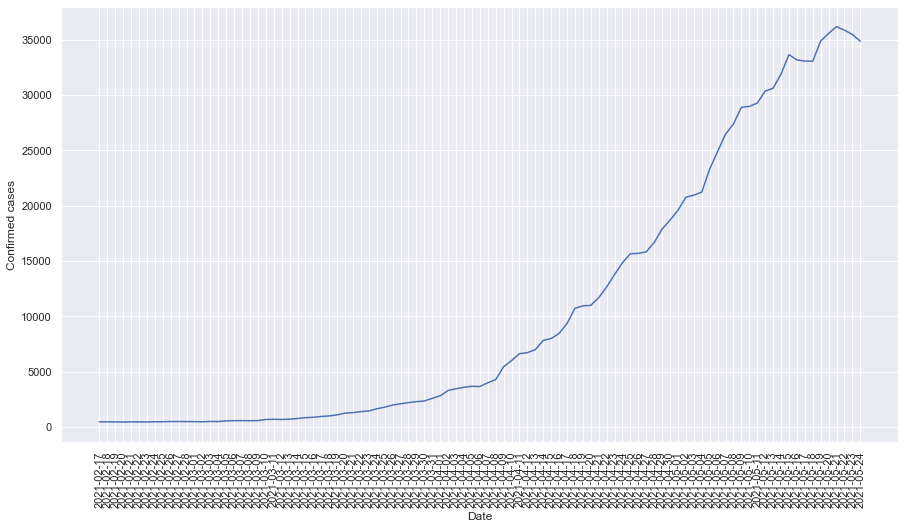

In [185]:

def statePlot(state):
    confct = [getDataStCt(data, d, state) for d in dates]
    df = pd.DataFrame(list(zip(dates, confct)),
               columns =['Date', 'Confirmed cases'])
    ax = sns.lineplot(x="Date", y='Confirmed cases', data=df)
    plt.xticks(rotation=90)
#     fig = plt.figure()
#     ax = fig.add_axes([0,0,1,1])
#     ax.bar(dates,confct)
state = 'TN'
statePlot(state)

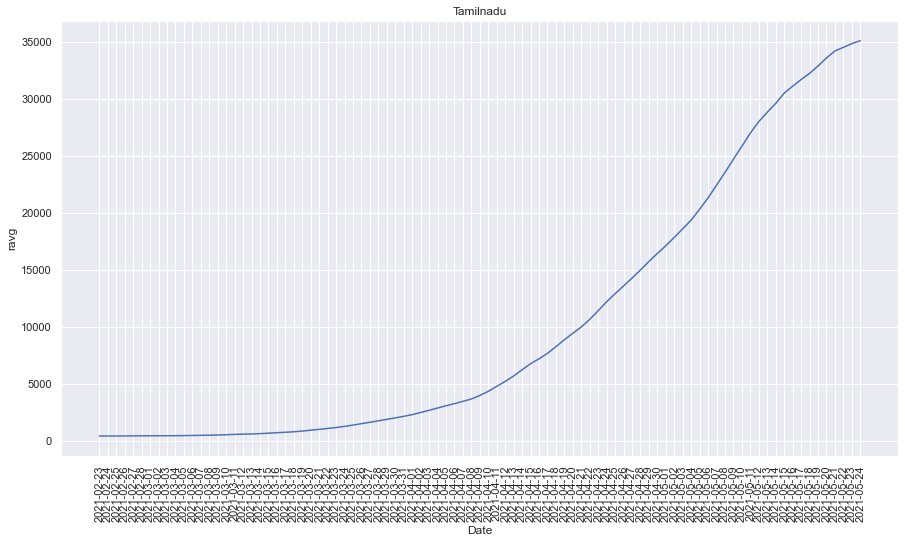

In [191]:

def stateRavgPlot(state):
    confct = [getDataStCt(data, d, state) for d in dates]
    df = pd.DataFrame(list(zip(dates, confct)),
               columns =['Date', 'Confirmed cases'])
    df['ravg'] = df['Confirmed cases'].rolling(7).mean()
    
    df = df[6:]
#     ax = sns.barplot(x="Date", y='Confirmed cases', data=df)

    sns.lineplot(data=df, x="Date", y='ravg')

    plt.title('Tamilnadu')
    plt.xticks(rotation=90)
#     fig = plt.figure()
#     ax = fig.add_axes([0,0,1,1])
#     ax.bar(dates,confct)
state = 'TN'
stateRavgPlot(state)

In [134]:
data.keys()

dict_keys(['AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DL', 'DN', 'GA', 'GJ', 'HP', 'HR', 'JH', 'JK', 'KA', 'KL', 'LA', 'LD', 'MH', 'ML', 'MN', 'MP', 'MZ', 'NL', 'OR', 'PB', 'PY', 'RJ', 'SK', 'TG', 'TN', 'TR', 'TT', 'UN', 'UP', 'UT', 'WB'])

In [135]:
print(data['TN']['dates']['2021-05-24'])

{'delta': {'confirmed': 34867, 'deceased': 404, 'recovered': 27026}, 'delta7': {'confirmed': 245920, 'deceased': 2867, 'recovered': 173069, 'tested': 1028080, 'vaccinated': 395382}, 'total': {'confirmed': 1877211, 'deceased': 20872, 'recovered': 1554759, 'tested': 26301572, 'vaccinated': 7390862}}


In [136]:
response = requests.get("https://api.covid19india.org/v4/min/data-all.min.json")
data = response.json()
print(response.status_code)

200


In [137]:
# print(data.keys())

In [138]:
print(data['2021-05-24'].keys())

dict_keys(['AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DL', 'DN', 'GA', 'GJ', 'HP', 'HR', 'JH', 'JK', 'KA', 'KL', 'LA', 'LD', 'MH', 'ML', 'MN', 'MP', 'MZ', 'NL', 'OR', 'PB', 'PY', 'RJ', 'SK', 'TG', 'TN', 'TR', 'TT', 'UP', 'UT', 'WB'])


In [139]:
print(data['2021-05-24']['TN']['districts'].keys())

dict_keys(['Airport Quarantine', 'Ariyalur', 'Chengalpattu', 'Chennai', 'Coimbatore', 'Cuddalore', 'Dharmapuri', 'Dindigul', 'Erode', 'Kallakurichi', 'Kancheepuram', 'Kanyakumari', 'Karur', 'Krishnagiri', 'Madurai', 'Nagapattinam', 'Namakkal', 'Nilgiris', 'Perambalur', 'Pudukkottai', 'Railway Quarantine', 'Ramanathapuram', 'Ranipet', 'Salem', 'Sivaganga', 'Tenkasi', 'Thanjavur', 'Theni', 'Thiruvallur', 'Thiruvarur', 'Thoothukkudi', 'Tiruchirappalli', 'Tirunelveli', 'Tirupathur', 'Tiruppur', 'Tiruvannamalai', 'Vellore', 'Viluppuram', 'Virudhunagar'])


In [140]:
print(data['2021-05-24']['TN']['districts']['Chennai'].keys())

dict_keys(['delta', 'delta7', 'meta', 'total'])


In [141]:
print(data['2021-05-24']['TN']['districts']['Chennai']['delta'])

{'confirmed': 5047, 'deceased': 81, 'recovered': 5870}


In [142]:
print(data['2021-05-24']['TN']['districts']['Chennai']['meta'])

{'notes': '[July 22]: 444 backdated deceased entries added to Chennai in TN bulletin.', 'population': 7100000, 'tested': {'last_updated': '2021-02-01'}}


In [143]:
print(data['2021-05-24']['TN']['districts']['Chennai']['total'])

{'confirmed': 483757, 'deceased': 6460, 'recovered': 429146, 'tested': 2667777, 'vaccinated': 1827816}


In [101]:
def getDataCt(data, date, district):
    dat = data[date]['TN']['districts'][district]['delta']
    return dat['confirmed']
getDataCt(data, '2021-05-24', 'Chennai')
    

5047

In [168]:
dates = list(data.keys())[-97:]

In [169]:
confct = [getDataCt(data, d, district) for d in dates]
df = pd.DataFrame(list(zip(dates, confct)),
               columns =['Date', 'Confirmed cases'])
df['ravg'] = df['Confirmed cases'].rolling(7).mean()
df = df[6:]

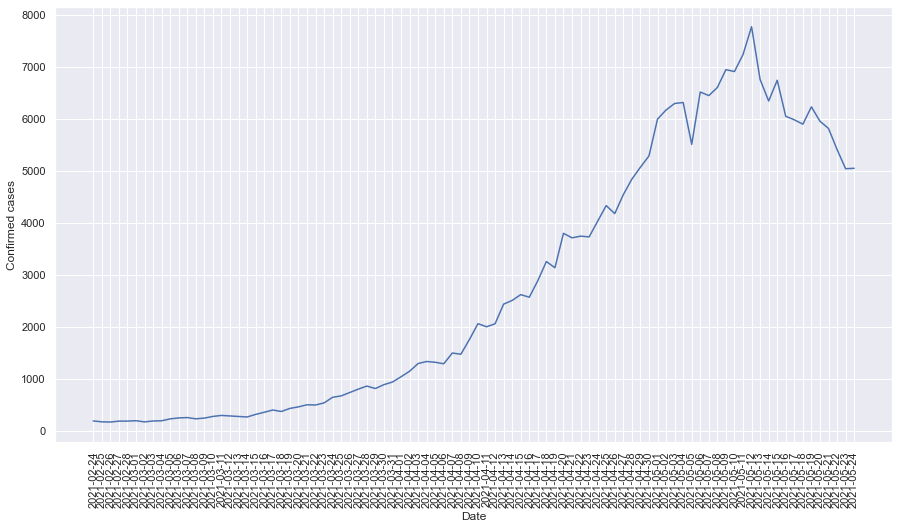

In [157]:

def districtPlot(district):
    confct = [getDataCt(data, d, district) for d in dates]

    df = pd.DataFrame(list(zip(dates, confct)),
                   columns =['Date', 'Confirmed cases'])
#     ax = sns.barplot(x="Date", y='Confirmed cases', data=df)

    sns.lineplot(data=df, x="Date", y="Confirmed cases")
    plt.title(district)
    plt.xticks(rotation=90)
#     fig = plt.figure()
#     ax = fig.add_axes([0,0,1,1])
#     ax.bar(dates,confct)
district = 'Chennai'
districtPlot(district)

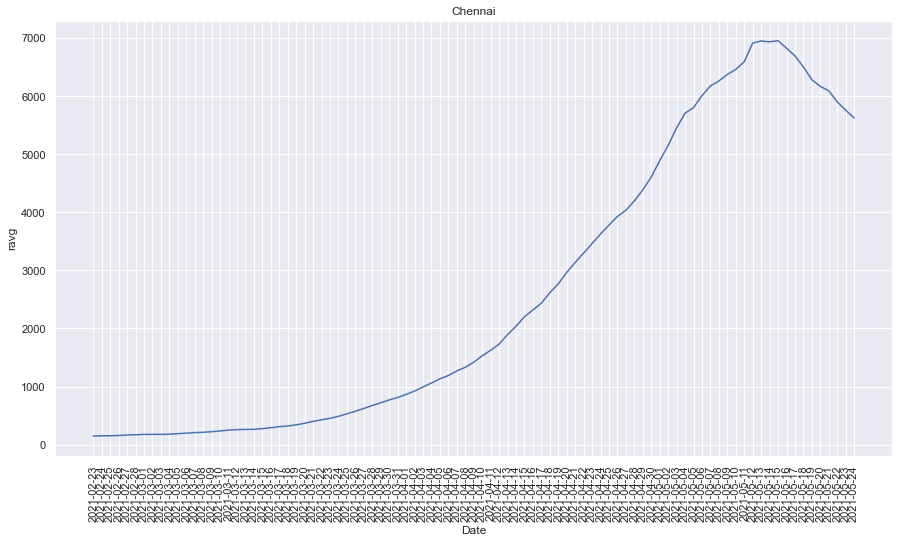

In [176]:

def districtPlotRavg(district):
    confct = [getDataCt(data, d, district) for d in dates]

    df = pd.DataFrame(list(zip(dates, confct)),
                   columns =['Date', 'Confirmed cases'])
    df['ravg'] = df['Confirmed cases'].rolling(7).mean()
    
    df = df[6:]
#     ax = sns.barplot(x="Date", y='Confirmed cases', data=df)

    sns.lineplot(data=df, x="Date", y='ravg')
    plt.title(district)
    plt.xticks(rotation=90)
#     fig = plt.figure()
#     ax = fig.add_axes([0,0,1,1])
#     ax.bar(dates,confct)
district = 'Chennai'
districtPlotRavg(district)

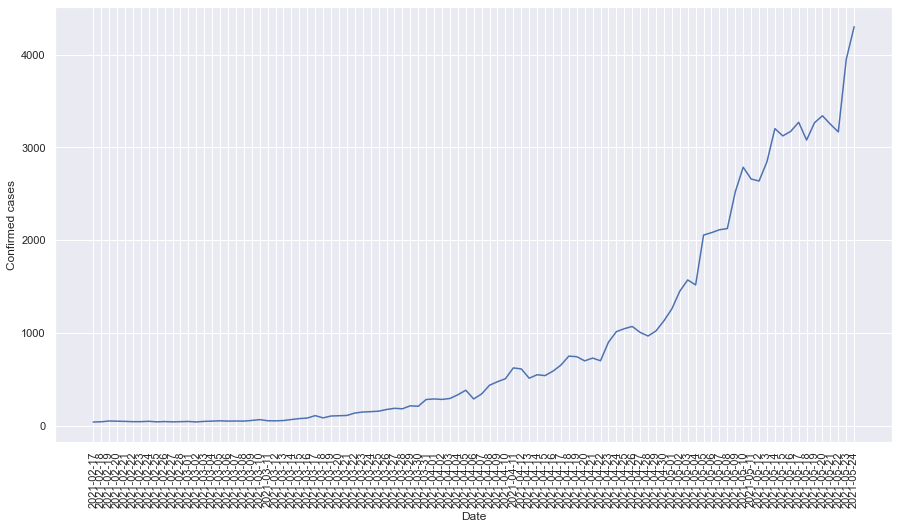

In [174]:
district = 'Coimbatore'
districtPlot(district)

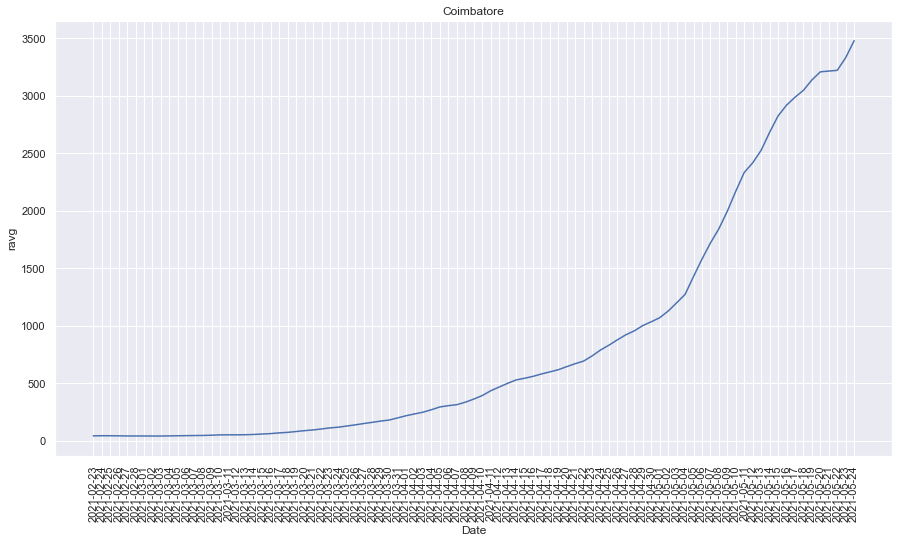

In [177]:
district = 'Coimbatore'
districtPlotRavg(district)

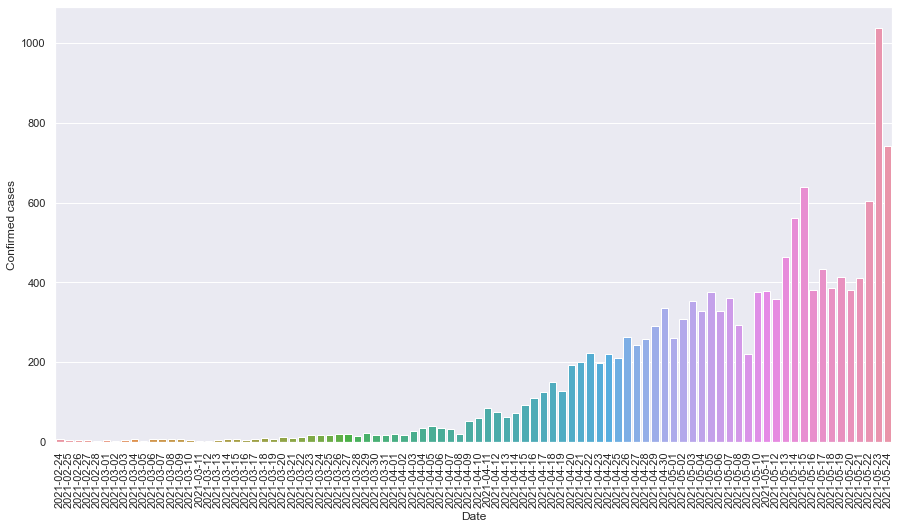

In [126]:
district = 'Namakkal'
districtPlot(district)